In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({"figure.figsize": (10, 7), "figure.dpi": 120})
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings("ignore")

In [5]:
folder_path = "data"
dtype = {
    "store_nbr": "category",
    "family": "category",
    "sales": "float32",
    "onpromotion": "uint64",
}

df = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [15]:
df["date"] = df["date"].dt.year.astype("str") + "-" + df["date"].dt.month.astype("str") + "-01"
df["date"] = pd.to_datetime(df["date"])
df = df.groupby("date").sales.sum().reset_index()

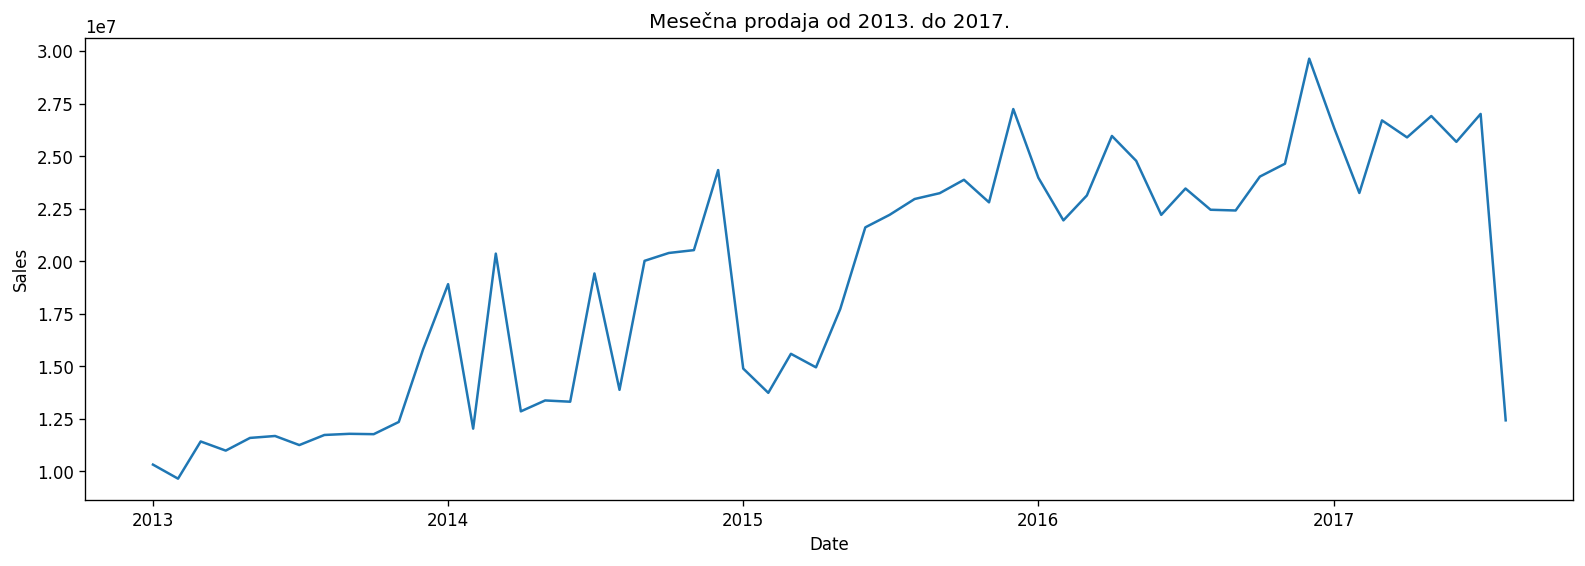

In [13]:
def plot_df(x, y, title="", xlabel="Date", ylabel="Sales"):
    plt.figure(figsize=(16, 5))
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(x=df["date"], y=df.sales, title="Mesečna prodaja od 2013. do 2017.")

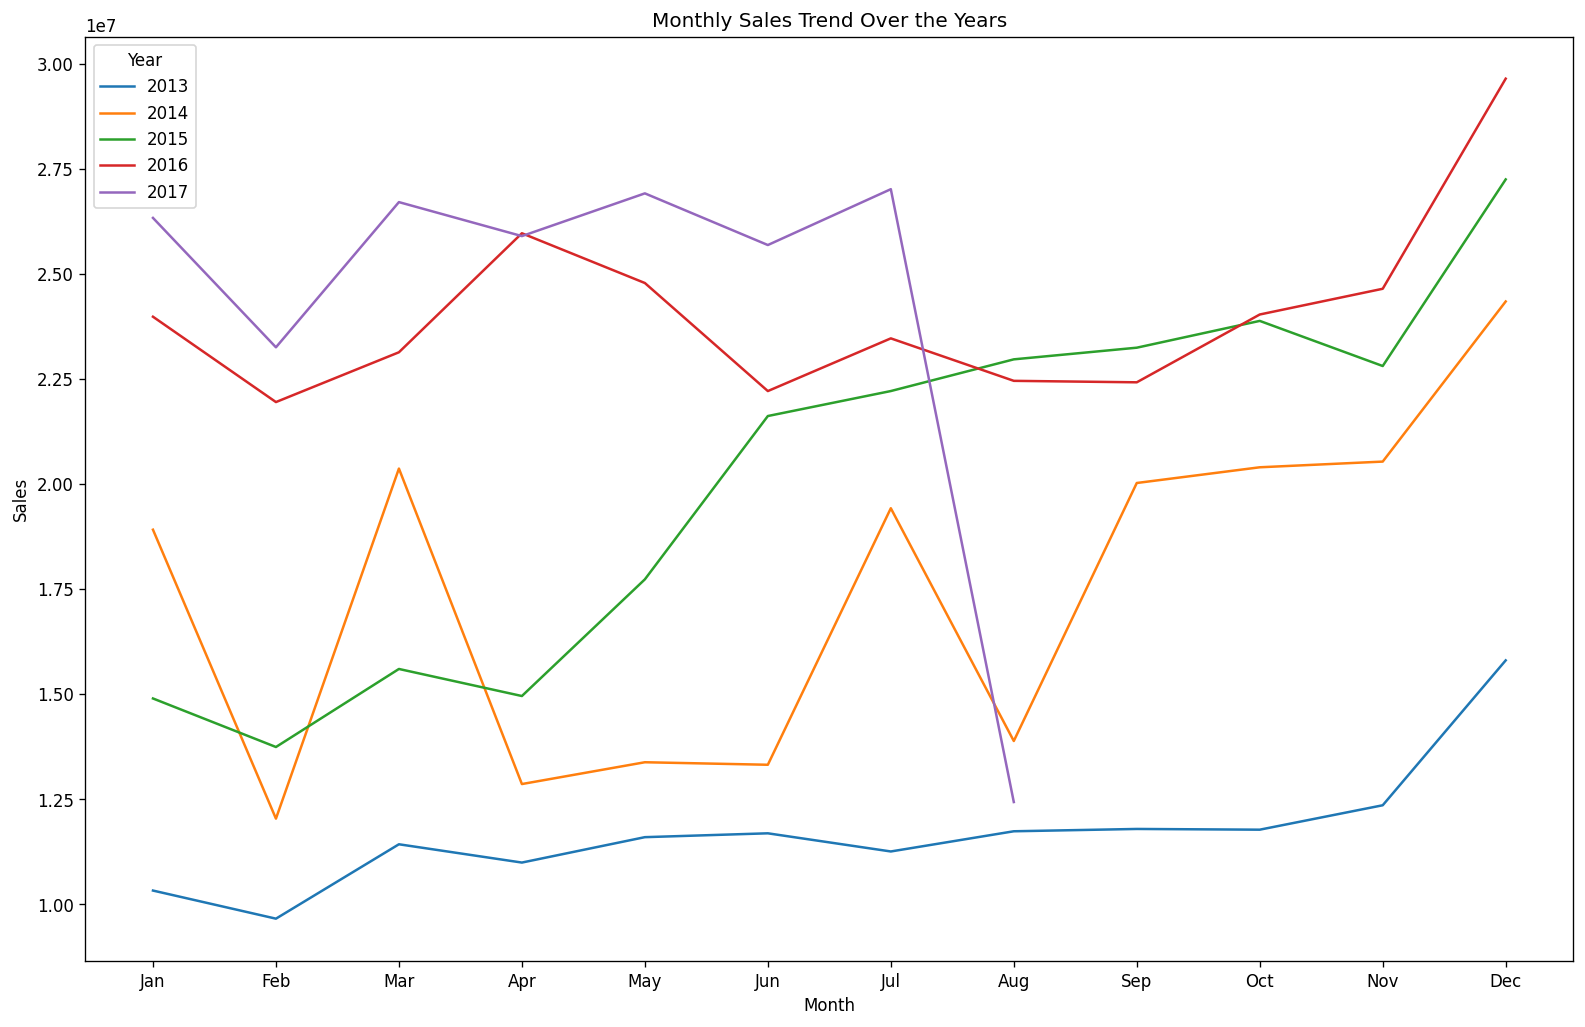

In [17]:
df["year_month"] = df["date"].dt.to_period("M")
monthly_sales = df.groupby("year_month").sales.sum().reset_index()
monthly_sales["year"] = monthly_sales["year_month"].dt.year
monthly_sales["month"] = monthly_sales["year_month"].dt.strftime("%b")

plt.figure(figsize=(16, 10))
for year in monthly_sales["year"].unique():
    subset = monthly_sales[monthly_sales["year"] == year]
    plt.plot(subset["month"], subset["sales"], label=year)
plt.title("Monthly Sales Trend Over the Years")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year")
plt.show()

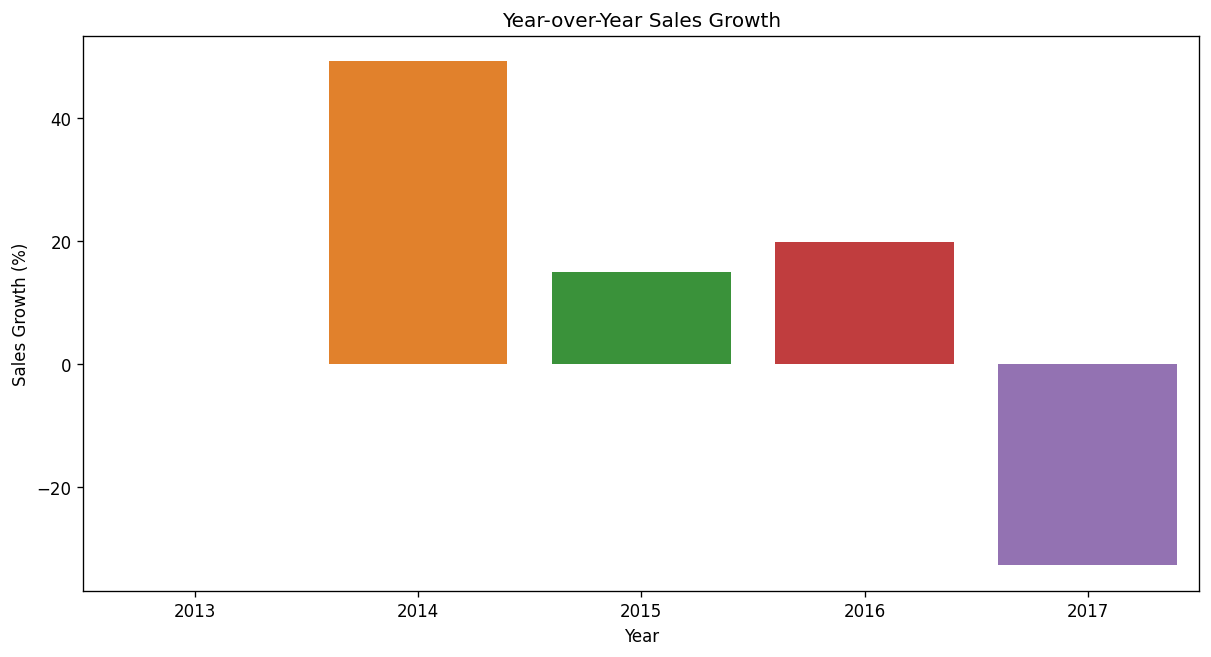

In [18]:
yearly_sales = df.groupby(df["date"].dt.year).sales.sum().reset_index()
yearly_sales["sales_pct_change"] = yearly_sales["sales"].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x="date", y="sales_pct_change", data=yearly_sales)
plt.title("Year-over-Year Sales Growth")
plt.xlabel("Year")
plt.ylabel("Sales Growth (%)")
plt.show()

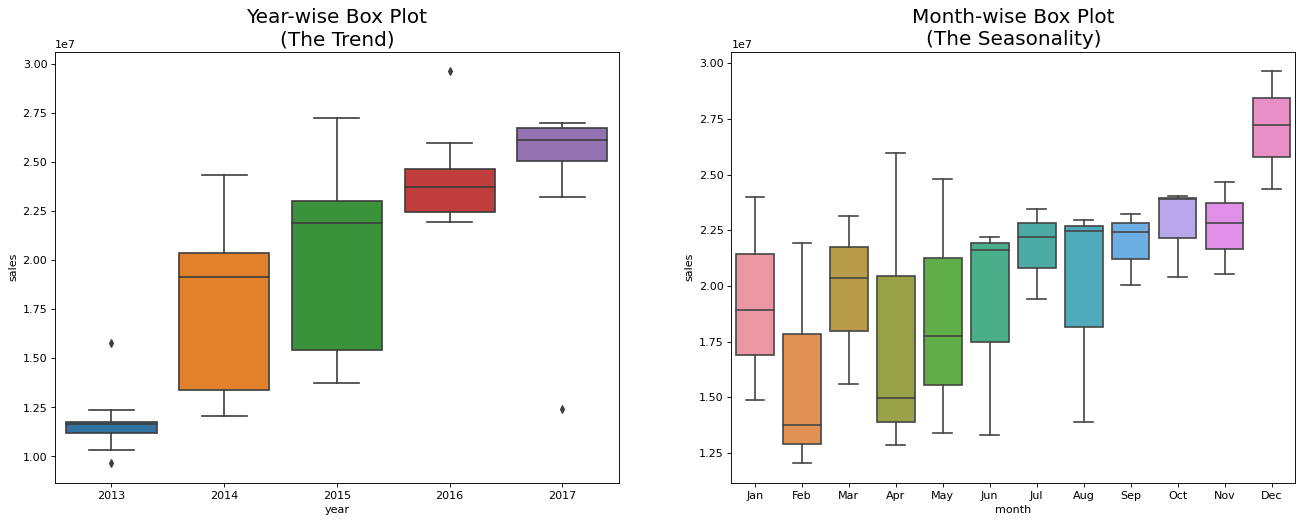

In [19]:
df["year"] = [d.year for d in df.date]
df["month"] = [d.strftime("%b") for d in df.date]
years = df["year"].unique()

fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x="year", y="sales", data=df, ax=axes[0])
sns.boxplot(x="month", y="sales", data=df.loc[~df.year.isin([2013, 2017]), :])

axes[0].set_title("Year-wise Box Plot\n(The Trend)", fontsize=18)
axes[1].set_title("Month-wise Box Plot\n(The Seasonality)", fontsize=18)
plt.show()

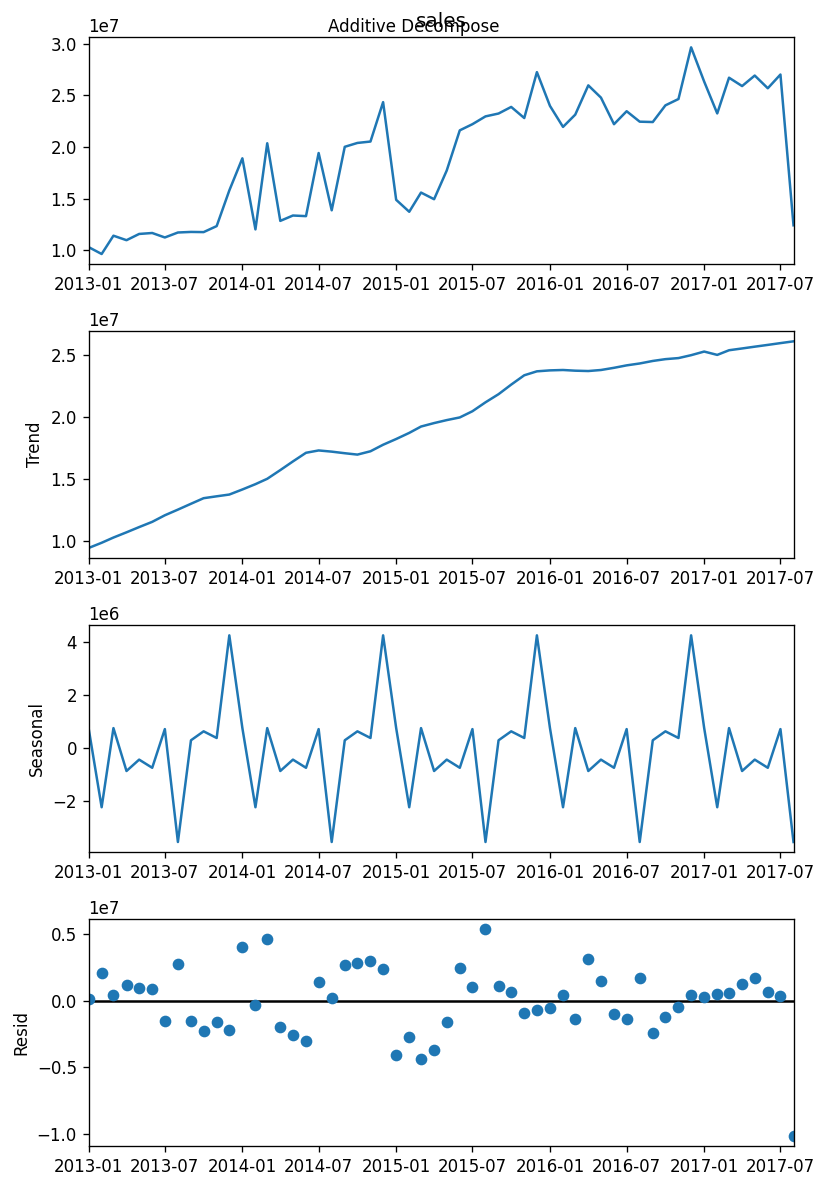

In [20]:
df.index = pd.to_datetime(df["date"], format="%Y-%m-%d")

result_add = seasonal_decompose(df["sales"], model="additive", extrapolate_trend="freq")

plt.rcParams.update({"figure.figsize": (7, 10)})
result_add.plot().suptitle("Additive Decompose", fontsize=10)
plt.show()

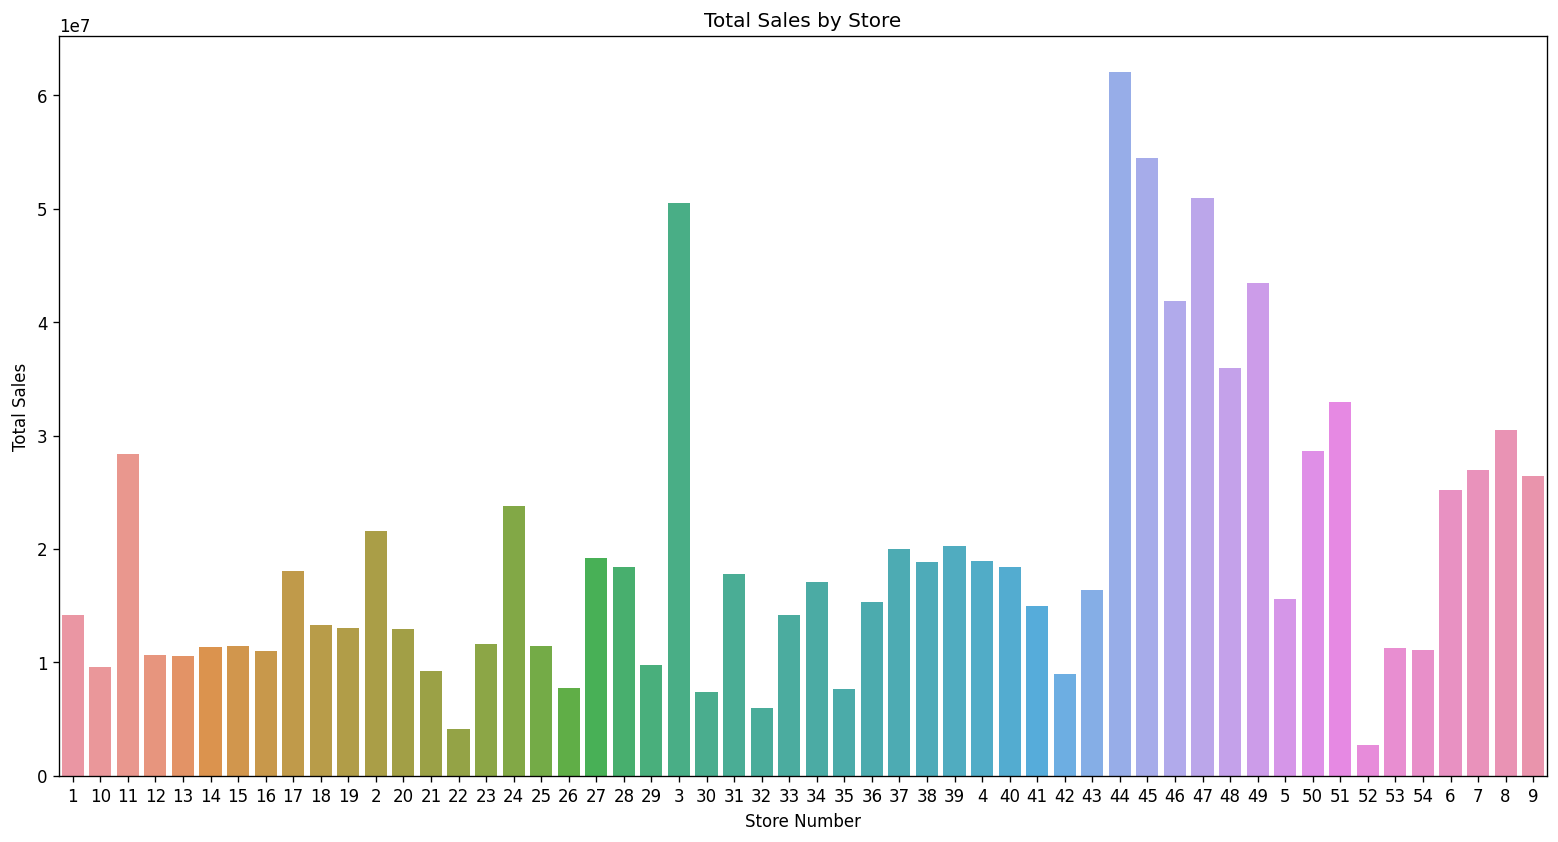

In [21]:
df_stores = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)

total_sales_per_store = df_stores.groupby("store_nbr").sales.sum().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x="store_nbr", y="sales", data=total_sales_per_store)
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

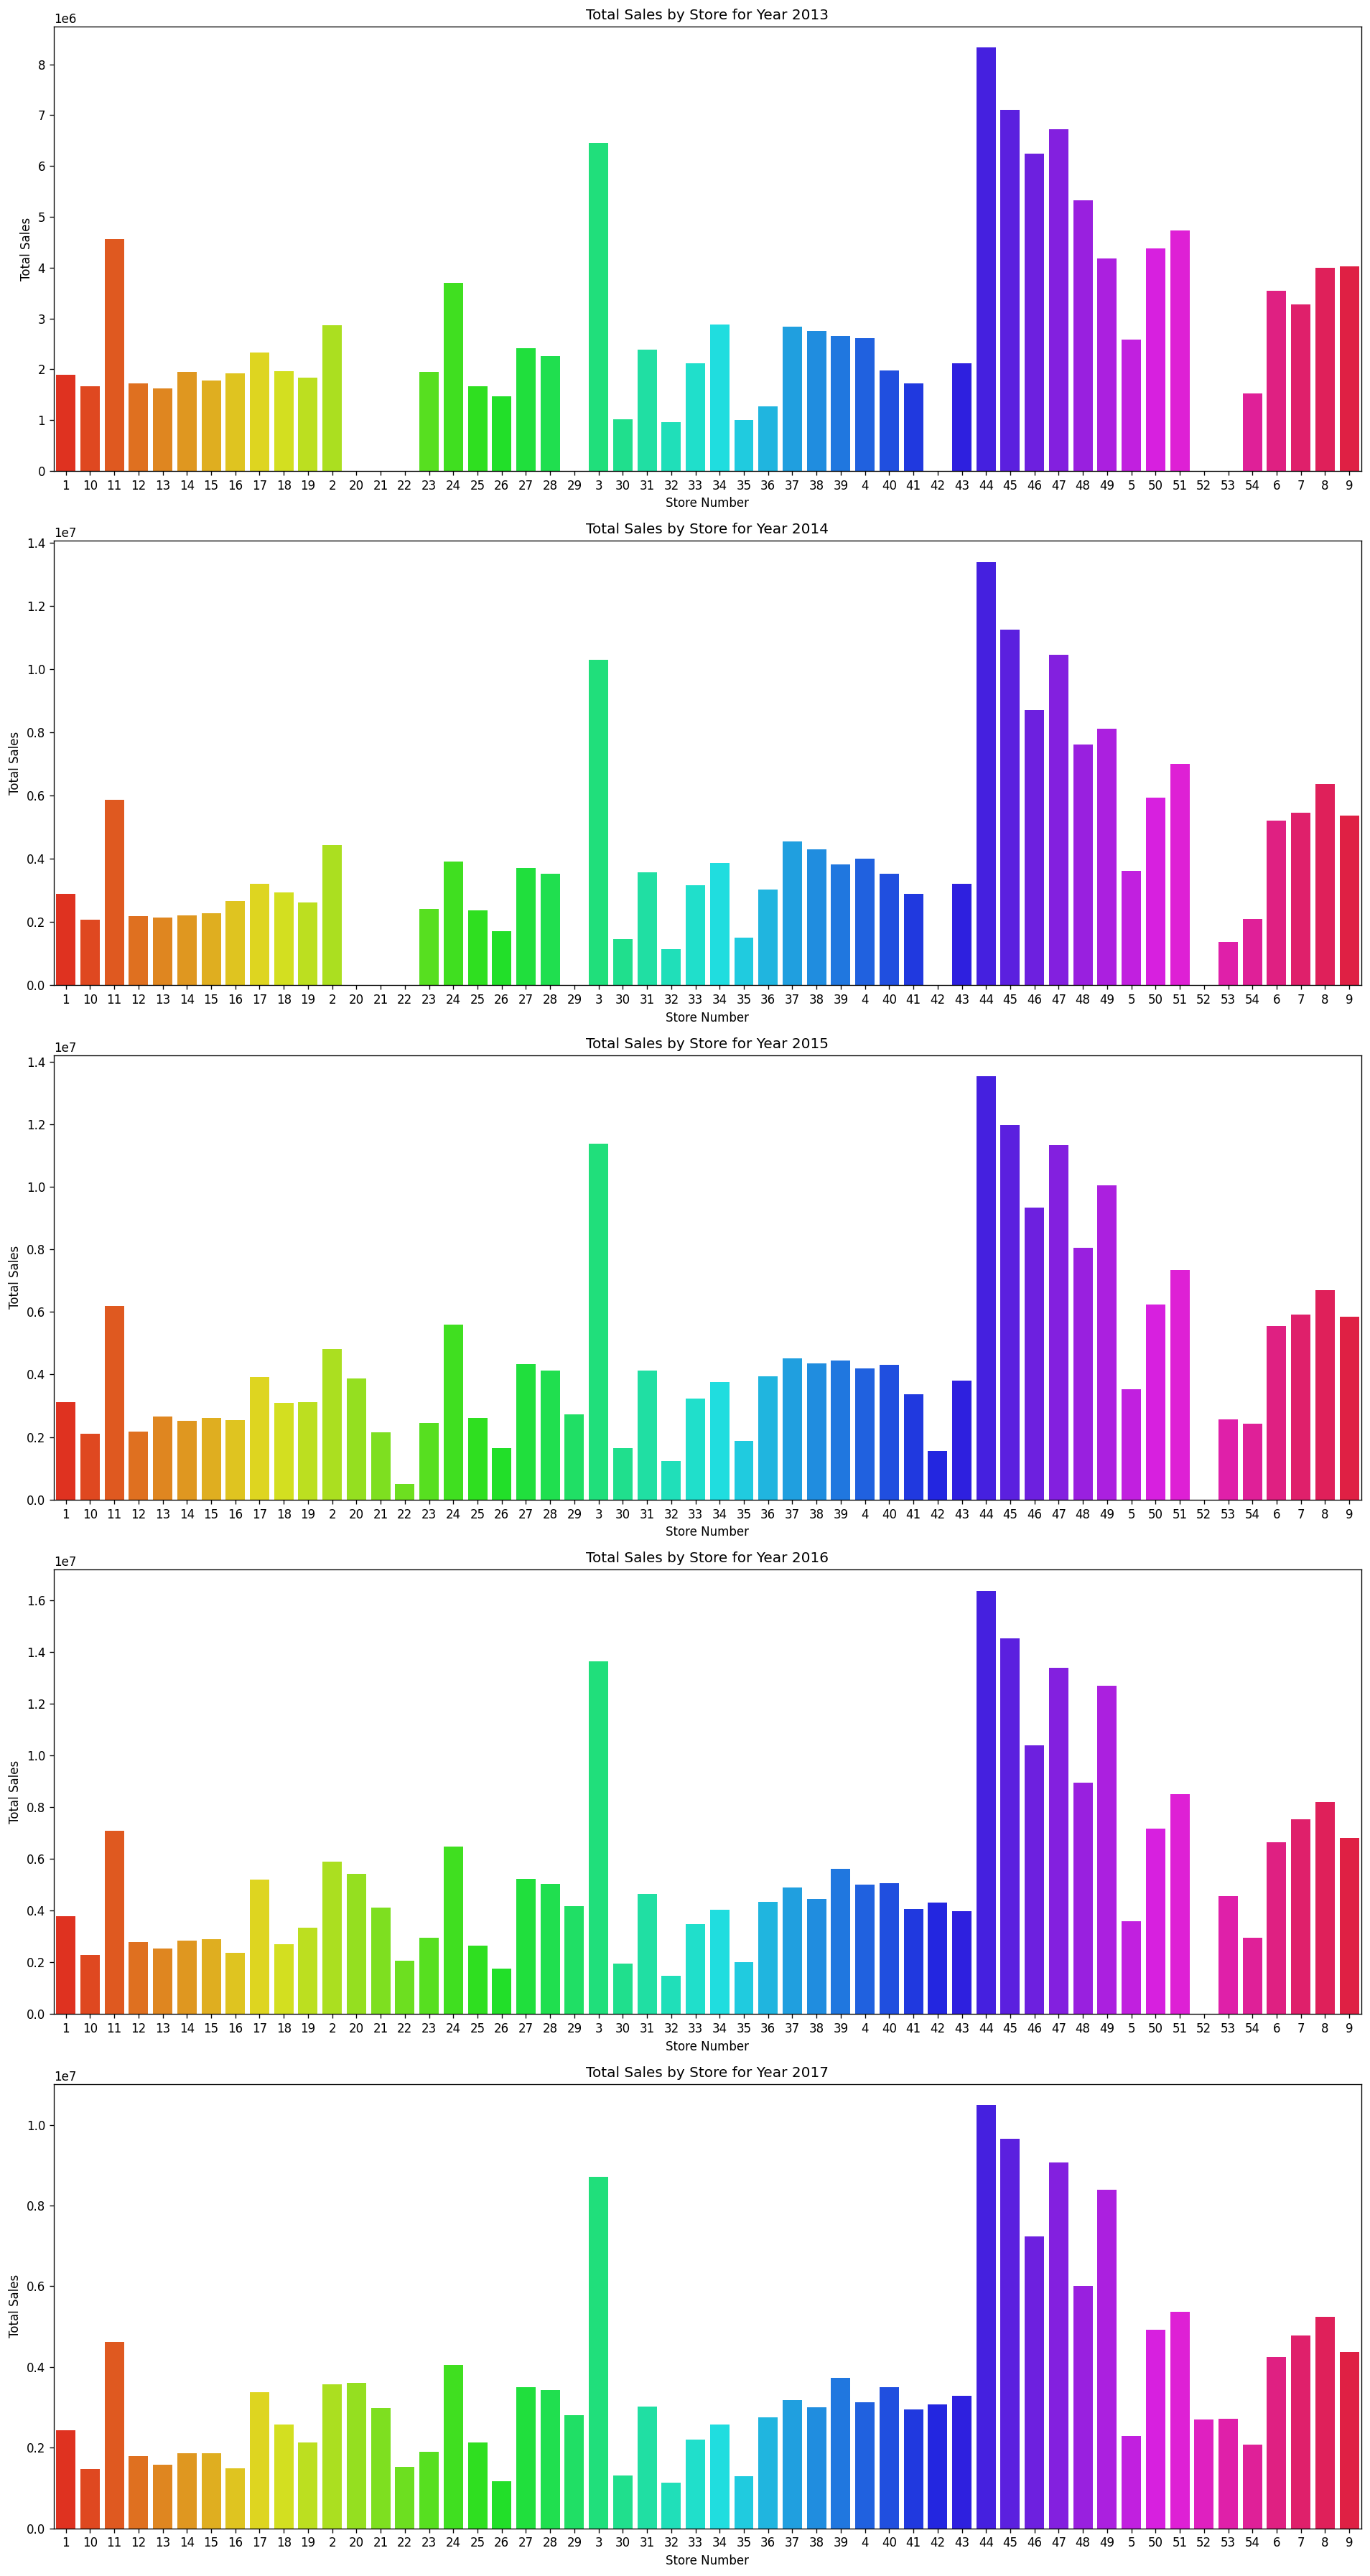

In [22]:
import seaborn as sns

total_sales_year_store = (
    df_stores.groupby(["store_nbr", df_stores["date"].dt.year]).sales.sum().reset_index()
)

years = total_sales_year_store["date"].unique()

num_stores = total_sales_year_store["store_nbr"].nunique()
colors = sns.color_palette("hsv", num_stores)

fig, axes = plt.subplots(len(years), figsize=(16, 6 * len(years)))

for i, year in enumerate(years):
    ax = axes[i] if len(years) > 1 else axes
    data = total_sales_year_store[total_sales_year_store["date"] == year]
    sns.barplot(x="store_nbr", y="sales", data=data, ax=ax, palette=colors)
    ax.set_title(f"Total Sales by Store for Year {year}")
    ax.set_xlabel("Store Number")
    ax.set_ylabel("Total Sales")

plt.tight_layout()
plt.show()

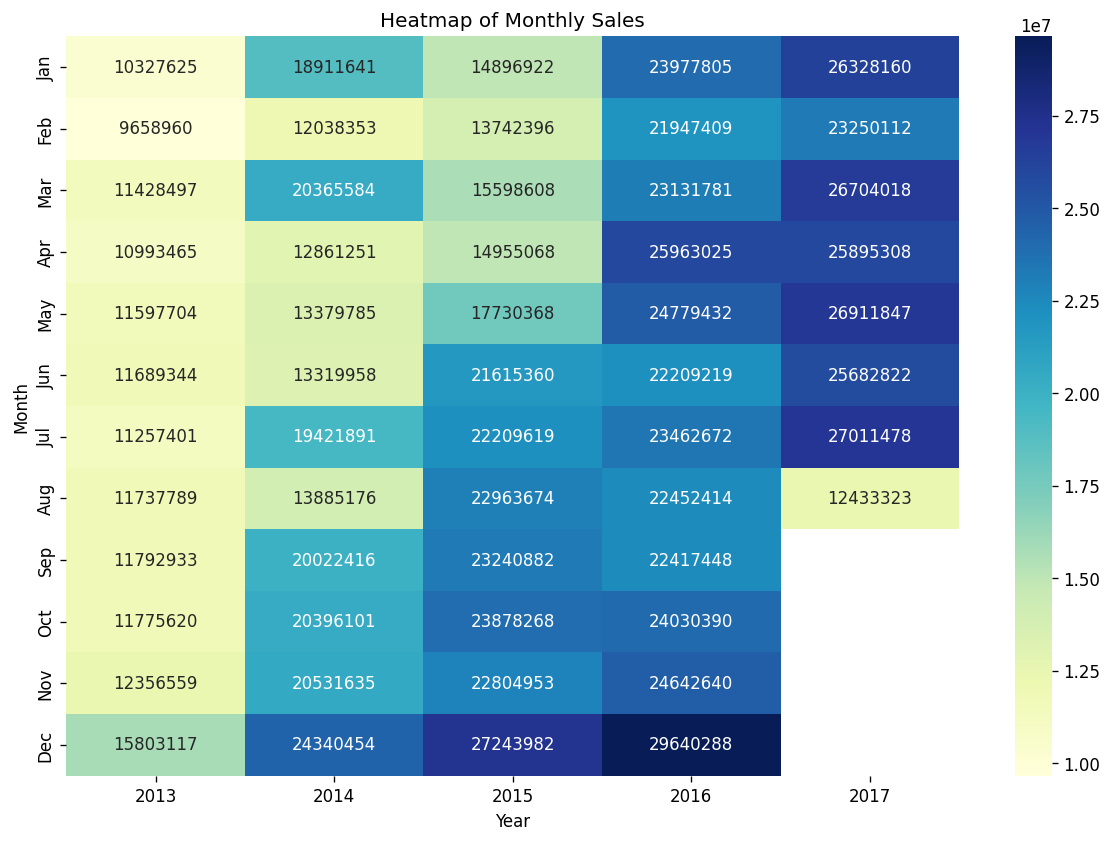

In [11]:
df = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)

df["date"] = df["date"].dt.year.astype("str") + "-" + df["date"].dt.month.astype("str") + "-01"
df["date"] = pd.to_datetime(df["date"])

df = df.groupby("date").sales.sum().reset_index()
df["year_month"] = df["date"].dt.to_period("M")

monthly_sales = df.groupby("year_month").sales.sum().reset_index()

monthly_sales["year"] = monthly_sales["year_month"].dt.year
monthly_sales["month"] = monthly_sales["year_month"].dt.strftime("%b")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_sales["month"] = pd.Categorical(
    monthly_sales["month"], categories=month_order, ordered=True
)

pivot_table = monthly_sales.pivot(index="month", columns="year", values="sales")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Monthly Sales")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

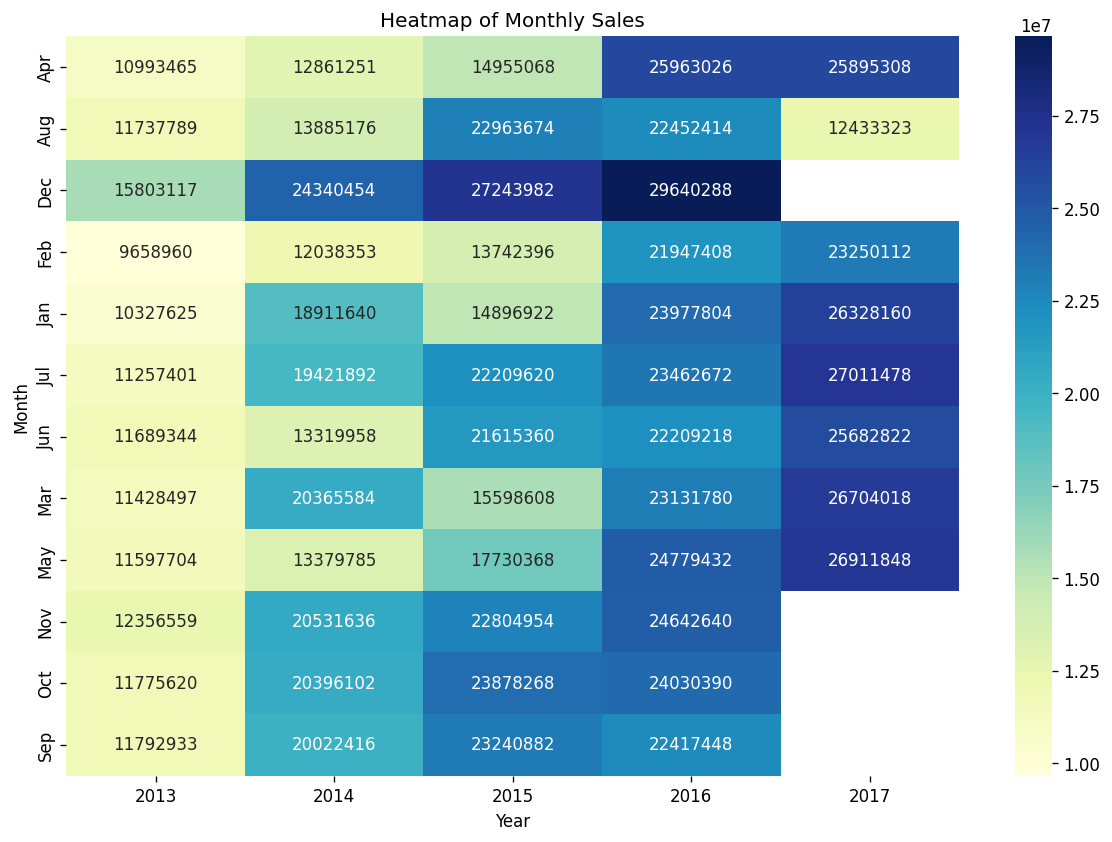

In [7]:
import pandas as pd

df = pd.read_csv(
    folder_path + "/train.csv", dtype=dtype, parse_dates=["date"], infer_datetime_format=True
)

df["date"] = df["date"].dt.year.astype("str") + "-" + df["date"].dt.month.astype("str") + "-01"
df["date"] = pd.to_datetime(df["date"])
df = df.groupby("date").sales.sum().reset_index()

df["year_month"] = df["date"].dt.to_period("M")
monthly_sales = df.groupby("year_month").sales.sum().reset_index()
monthly_sales["year"] = monthly_sales["year_month"].dt.year
monthly_sales["month"] = monthly_sales["year_month"].dt.strftime("%b")

pivot_table = monthly_sales.pivot(index="month", columns="year", values="sales")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Monthly Sales")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In [1]:
import pandas as pd
import numpy as np
import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

In [2]:
df_holi = pd.read_csv("data/holidays_events.csv")
df_oil = pd.read_csv("data/oil.csv")
df_stores = pd.read_csv("data/stores.csv")
df_trans = pd.read_csv("data/transactions.csv")

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
# copying of train data and merging other data
df_train1 = df_train.merge(df_holi, on="date", how="left")
df_train1 = df_train1.merge(df_oil, on="date", how="left")
df_train1 = df_train1.merge(df_stores, on="store_nbr", how="left")
df_train1 = df_train1.merge(df_trans, on=["date", "store_nbr"], how="left")
df_train1 = df_train1.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

df_train1["date"] = pd.to_datetime(df_train1["date"])
df_train1["year"] = df_train1["date"].dt.year
df_train1["month"] = df_train1["date"].dt.month
df_train1["week"] = df_train1["date"].dt.isocalendar().week
df_train1["quarter"] = df_train1["date"].dt.quarter
df_train1["day_of_week"] = df_train1["date"].dt.day_name()
df_train1[:2]

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [4]:
# data
df_m_sa = df_train1.groupby("month").agg({"sales": "mean"}).reset_index()
df_m_sa["sales"] = round(df_m_sa["sales"], 2)
df_m_sa["month_text"] = df_m_sa["month"].apply(lambda x: calendar.month_abbr[x])
df_m_sa["text"] = df_m_sa["month_text"] + " - " + df_m_sa["sales"].astype(str)

df_w_sa = df_train1.groupby("week").agg({"sales": "mean"}).reset_index()
df_q_sa = df_train1.groupby("quarter").agg({"sales": "mean"}).reset_index()

# chart color
df_m_sa["color"] = "#496595"
df_m_sa["color"][:-1] = "#c6ccd8"
df_w_sa["color"] = "#c6ccd8"

# chart
fig = make_subplots(
    rows=2,
    cols=2,
    vertical_spacing=0.08,
    row_heights=[0.7, 0.3],
    specs=[[{"type": "bar"}, {"type": "pie"}], [{"colspan": 2}, None]],
    column_widths=[0.7, 0.3],
    subplot_titles=(
        "Month wise Avg Sales Analysis",
        "Quarter wise Avg Sales Analysis",
        "Week wise Avg Sales Analysis",
    ),
)

fig.add_trace(
    go.Bar(
        x=df_m_sa["sales"],
        y=df_m_sa["month"],
        marker=dict(color=df_m_sa["color"]),
        text=df_m_sa["text"],
        textposition="auto",
        name="Month",
        orientation="h",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Pie(
        values=df_q_sa["sales"],
        labels=df_q_sa["quarter"],
        name="Quarter",
        marker=dict(colors=["#334668", "#496595", "#6D83AA", "#91A2BF", "#C8D0DF"]),
        hole=0.7,
        hoverinfo="label+percent+value",
        textinfo="label+percent",
    ),
    row=1,
    col=2,
)
fig.add_trace(
    go.Scatter(
        x=df_w_sa["week"],
        y=df_w_sa["sales"],
        mode="lines+markers",
        fill="tozeroy",
        fillcolor="#c6ccd8",
        marker=dict(color="#496595"),
        name="Week",
    ),
    row=2,
    col=1,
)

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(
    tickmode="array", tickvals=df_w_sa.week, ticktext=[i for i in range(1, 53)], row=2, col=1
)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(
    height=750,
    bargap=0.15,
    margin=dict(b=0, r=20, l=20),
    title_text="Average Sales Analysis",
    template="plotly_white",
    title_font=dict(size=25, color="#8a8d93", family="Lato, sans-serif"),
    font=dict(color="#8a8d93"),
    hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
    showlegend=False,
)
fig.show()

In [5]:
df_dw_sa = df_train1.groupby("day_of_week").agg({"sales": "mean"}).reset_index()
df_dw_sa.sales = round(df_dw_sa.sales, 2)

fig = px.bar(
    df_dw_sa,
    y="day_of_week",
    x="sales",
    title="Avg Sales vs Day of Week",
    color_discrete_sequence=["#c6ccd8"],
    text="sales",
    category_orders=dict(
        day_of_week=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    ),
)
fig.update_yaxes(showgrid=False, ticksuffix=" ", showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(
    margin=dict(t=60, b=0, l=0, r=0),
    height=350,
    hovermode="y unified",
    yaxis_title=" ",
    template="plotly_white",
    title_font=dict(size=25, color="#8a8d93", family="Lato, sans-serif"),
    font=dict(color="#8a8d93"),
    hoverlabel=dict(bgcolor="#c6ccd8", font_size=13, font_family="Lato, sans-serif"),
)

In [6]:
df_st_ht = df_train1.groupby(["store_type", "holiday_type"]).agg({"sales": "mean"}).reset_index()
df_st_ht["sales"] = round(df_st_ht["sales"], 2)


fig = px.scatter(
    df_st_ht,
    x="store_type",
    color="sales",
    y="holiday_type",
    size="sales",
    color_discrete_sequence=px.colors.qualitative.D3,
    title="Average Sales: Store Type Vs Holiday Type",
)

fig.update_yaxes(ticksuffix="  ")
fig.update_layout(
    height=400,
    xaxis_title="",
    yaxis_title="",
    margin=dict(b=0),
    plot_bgcolor="#fafafa",
    paper_bgcolor="#fafafa",
    title_font=dict(size=29, color="#444", family="Lato, sans-serif"),
    font=dict(color="#555"),
    hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
)
fig.show()

In [7]:
# data
df_y_m_ht = (
    df_train1.groupby(["year", "month", "holiday_type"]).agg({"sales": "mean"}).reset_index()
)
df_y_m_ht["sales"] = round(df_y_m_ht["sales"], 2)

# chart
fig = px.scatter(
    df_y_m_ht,
    x="month",
    y="holiday_type",
    color="sales",
    size="sales",
    facet_row="year",
    title="Average Sales: Holiday_type Vs Year(Month)",
)
# styling
fig.update_yaxes(ticksuffix="  ")
fig.update_xaxes(
    tickmode="array",
    tickvals=[i for i in range(1, 13)],
    ticktext=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
)
fig.update_layout(
    height=900,
    xaxis_title="",
    yaxis_title="",
    margin=dict(t=70, b=0),
    plot_bgcolor="#fafafa",
    paper_bgcolor="#fafafa",
    title_font=dict(size=29, color="#444", family="Lato, sans-serif"),
    font=dict(color="#555"),
    hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
)
fig.show()